# Importing the packages and the dataset

# Business Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import seaborn as sns

import dask.dataframe as dd



### Reading the data with Pandas

In [3]:
%%time

train = pd.read_csv('new_train.csv')                             # Reading data using simple Pandas

Wall time: 730 ms


### Reading the data with Dask

In [5]:
%%time

dask_train = dd.read_csv('new_train.csv')                        # Reading data using dask

Wall time: 77 ms


For now we will continue to work with our pandas dataframe.

In [6]:
print(train.shape)

(82000, 43)


In [7]:
pd.set_option('display.max_columns', 50)

train.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,time,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,234,14,1.0,1.0,0.0,0.0,0.06,0.06,0.0,255,14,0.05,0.07,0.00,0.00,1.0,1.0,0.0,0.0,1.0,20
1,0,tcp,http,SF,241,12079,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.00,0.00,0.0,32,255,1.00,0.00,0.03,0.04,0.0,0.0,0.0,0.0,0.0,21
2,0,icmp,urp_i,SF,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,2,0.0,0.0,0.0,0.0,0.05,0.05,0.0,255,18,0.07,0.01,0.07,0.00,0.0,0.0,0.0,0.0,0.0,18
3,0,tcp,http,SF,229,309,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0.0,0.0,0.0,0.0,1.00,0.00,0.0,58,255,1.00,0.00,0.02,0.01,0.0,0.0,0.0,0.0,0.0,21
4,0,tcp,ftp_data,SF,12165,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.00,0.00,0.0,143,44,0.27,0.03,0.27,0.05,0.0,0.0,0.0,0.0,0.0,21


In [8]:
# Lets have a look at the attack column which is the target column to be predicted

train.iloc[:,-2].value_counts()

0.0    67342
1.0    14658
Name: attack, dtype: int64

This is an imbalanced class classification

# Exploratory Data Analysis

In [76]:
import pandas_profiling

reports1=pandas_profiling.ProfileReport(train)

In [77]:
reports1.to_file('train_merge_EDA.html')

In this report we are able to see that there is strong correlation between a lot of columns.  <br>
If this were a regression problem these columns are bad and needed to be dropped. But this is a classification columns.

In [9]:
# Checking the data types and missing values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82000 entries, 0 to 81999
Data columns (total 43 columns):
Duration                       82000 non-null int64
Protocol_type                  82000 non-null object
Service                        82000 non-null object
Flag                           82000 non-null object
Src_bytes                      82000 non-null int64
Dst_bytes                      82000 non-null int64
Land                           82000 non-null int64
Wrong_fragment                 82000 non-null int64
Urgent                         82000 non-null int64
Hot                            82000 non-null int64
Num_failed_logins              82000 non-null int64
Logged_in                      82000 non-null int64
Num_compromised                82000 non-null int64
Root_shell                     82000 non-null int64
Su_attempted                   82000 non-null int64
Num_root                       82000 non-null int64
Num_file_creations             82000 non-null int64
Num_

**There are no null values.**

In [10]:
# Lets separate the categorical columns

cat_cols = ['Protocol_type','Service','Flag']

**Descriptive Analysis of the columns**

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,82000.0,204.415256,1.825495e+03,0.0,0.00,0.00,0.00,42778.0
Src_bytes,82000.0,11909.053793,3.852300e+05,0.0,42.00,215.00,312.00,89581520.0
Dst_bytes,82000.0,8611.221915,1.399359e+06,0.0,0.00,313.00,1512.00,400291060.0
Land,82000.0,0.000159,1.259021e-02,0.0,0.00,0.00,0.00,1.0
Wrong_fragment,82000.0,0.009305,1.634210e-01,0.0,0.00,0.00,0.00,3.0
Urgent,82000.0,0.000171,1.780584e-02,0.0,0.00,0.00,0.00,3.0
Hot,82000.0,0.217707,2.227594e+00,0.0,0.00,0.00,0.00,77.0
Num_failed_logins,82000.0,0.001244,4.604812e-02,0.0,0.00,0.00,0.00,4.0
Logged_in,82000.0,0.589829,4.918675e-01,0.0,0.00,1.00,1.00,1.0
Num_compromised,82000.0,0.419951,2.967376e+01,0.0,0.00,0.00,0.00,7479.0


There are 39 numeric columns. <br>
A lot of them are binary and a few have numeric values.  <br>
Lets have a look at their correlation plot. 

In [12]:
# pd.set_option('display.max_columns', 50)
corr_matrix = train.corr()
corr_matrix

,Duration,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack,last_flag
Duration,1.000000,0.015477,0.077427,-0.001410,-0.006376,0.007207,0.004310,0.023874,-0.086462,0.076148,0.103768,0.155859,0.081181,0.176950,-0.001913,0.127336,NaN,-0.000297,-0.005410,-0.056181,-0.045141,-0.040904,-0.041176,0.138054,0.141844,0.020497,0.031456,-0.046641,0.057049,-0.162204,-0.173513,0.313536,0.232848,-0.024685,-0.025814,-0.026152,0.109148,0.139179,0.042065,-0.108761
Src_bytes,0.015477,1.000000,0.016087,-0.000389,-0.001744,-0.000273,0.000437,-0.000805,0.013972,-0.000381,-0.001066,-0.000853,-0.000423,-0.000503,-0.000449,-0.001366,NaN,-0.000106,-0.003086,-0.015488,-0.012135,-0.010178,-0.010031,-0.008593,-0.008513,0.012281,-0.002454,-0.007848,-0.008670,-0.032315,-0.026382,0.006399,0.017503,-0.002219,-0.009287,-0.010360,-0.008121,-0.008509,-0.006813,-0.027872
Dst_bytes,0.077427,0.016087,1.000000,-0.000077,-0.000350,0.000961,-0.000180,0.002594,-0.002726,0.004506,0.004536,0.004289,0.004501,0.000576,-0.000119,0.001622,NaN,-0.000002,-0.000474,-0.003011,-0.002252,-0.001856,-0.001862,0.011936,0.011887,0.002744,-0.001527,-0.001948,0.002521,-0.005415,-0.005982,0.009482,0.010621,-0.001190,-0.001571,-0.001401,0.012555,0.012308,0.006558,-0.020595
Land,-0.001410,-0.000389,-0.000077,1.000000,-0.000717,-0.000121,-0.001231,-0.000340,-0.015100,-0.000178,-0.000528,-0.000379,-0.000193,-0.000393,-0.000270,-0.000637,NaN,-0.000044,-0.001357,-0.005623,-0.004991,0.035068,0.035253,-0.003576,-0.003592,0.002788,-0.002809,0.038049,-0.019693,-0.018612,0.009375,-0.004559,0.039552,0.100947,0.035224,0.023066,-0.003786,-0.003672,0.009294,-0.066902
Wrong_fragment,-0.006376,-0.001744,-0.000350,-0.000717,1.000000,-0.000546,-0.005565,-0.001538,-0.068279,-0.000806,-0.002388,-0.001716,-0.000872,-0.001777,-0.001222,-0.002881,NaN,-0.000199,-0.006135,0.007660,0.017324,-0.007315,-0.021126,-0.015767,-0.016241,0.011972,-0.011081,-0.020824,0.037614,-0.056022,-0.061932,0.052901,0.026914,-0.012122,-0.016834,-0.020463,0.035126,-0.016603,0.122042,-0.139410
Urgent,0.007207,-0.000273,0.000961,-0.000121,-0.000546,1.000000,0.000293,0.118730,0.005211,0.033286,0.081388,0.097818,0.032422,0.025207,-0.000206,0.010682,NaN,-0.000033,-0.001033,-0.004929,-0.003938,-0.003593,-0.003558,-0.002723,-0.002735,0.004327,-0.002506,-0.004127,-0.006351,-0.014337,-0.010463,0.011813,0.004384,0.008595,-0.003268,-0.003446,-0.002883,-0.002796,0.002677,-0.027741
Hot,0.004310,0.000437,-0.000180,-0.001231,-0.005565,0.000293,1.000000,0.000808,0.080576,0.001990,0.011199,-0.000004,0.001571,0.030108,0.001487,-0.004321,NaN,0.001226,0.834501,-0.049983,-0.039756,-0.033769,-0.033702,-0.025012,-0.024416,0.037069,0.000130,-0.032466,-0.008890,-0.107435,-0.092578,0.011620,-0.032200,-0.027340,-0.033172,-0.032908,-0.022034,-0.023392,-0.012462,-0.086896
Num_failed_logins,0.023874,-0.000805,0.002594,-0.000340,-0.001538,0.118730,0.000808,1.000000,-0.009241,0.023242,0.043144,0.089284,0.022050,0.023366,-0.000580,0.000792,NaN,-0.000094,-0.000424,-0.013830,-0.011086,-0.006774,-0.008343,0.010930,0.010817,0.009457,0.001417,-0.011627,-0.011746,-0.035582,-0.027790,0.007478,-0.008184,-0.002316,-0.001428,-0.003068,0.005477,0.004794,-0.006382,-0.069527
Logged_in,-0.086462,0.013972,-0.002726,-0.015100,-0.068279,0.005211,0.080576,-0.009241,1.000000,0.011802,0.034976,0.025129,0.012770,0.026029,0.017893,0.042199,NaN,0.002912,0.088918,-0.523876,-0.324615,-0.398907,-0.399616,-0.319488,-0.314961,0.495974,-0.214206,0.120351,-0.321618,0.483689,0.468745

**Num_outbound_cmds** is empty column. We need to drop it.

**Let's check for any correlation in the data**

### Random 15 columns and make correlations

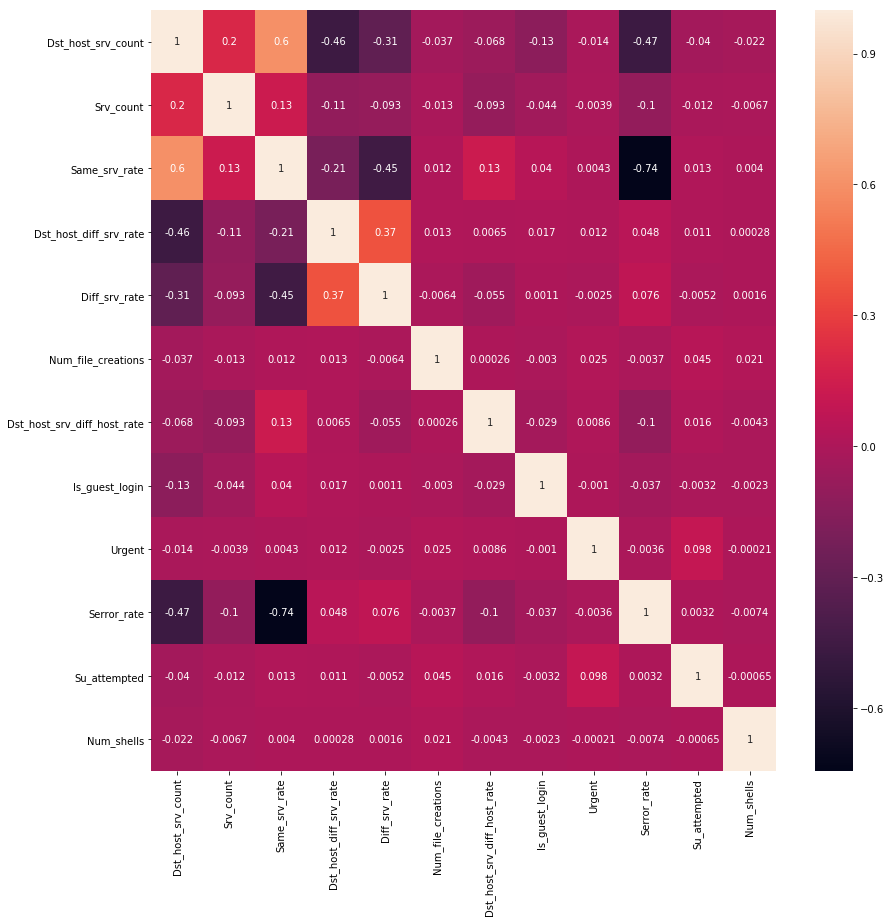

In [13]:
small_df = train.sample(15, axis=1)
small_corr_matrix = small_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(small_corr_matrix, annot=True)

### Lets look at some strong correlations.

In [14]:
col_names = train.columns
col_names

Index(['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
       'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent', 'Hot',
       'Num_failed_logins', 'Logged_in', 'Num_compromised', 'Root_shell',
       'Su_attempted', 'Num_root', 'Num_file_creations', 'Num_shells',
       'Num_access_files', 'Num_outbound_cmds', 'Is_hot_login',
       'Is_guest_login', 'Count', 'Srv_count', 'Serror_rate',
       'Srv_serror_rate', 'Rerror_rate', 'Srv_rerror_rate', 'Same_srv_rate',
       'Diff_srv_rate', 'Srv_diff_host_rate', 'Dst_host_count',
       'Dst_host_srv_count', 'Dst_host_same_srv_rate',
       'Dst_host_diff_srv_rate', 'Dst_host_same_src_port_rate',
       'Dst_host_srv_diff_host_rate', 'Dst_host_serror_rate',
       'Dst_host_srv_serror_rate', 'Dst_host_rerror_rate',
       'Dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [15]:
corr_threshold = 0.8

print("---------------CHECKING FOR CORRELATION------------")
for c in col_names:
    for r in col_names:
        if (r < c):
            if (c not in cat_cols) and (c is not 'attack') and (r not in cat_cols) and (r is not 'attack') :
                if abs(corr_matrix[r][c]) > corr_threshold:
                    print(c +" : "+ r+" : "+ str(corr_matrix[r][c]))

---------------CHECKING FOR CORRELATION------------
Num_root : Num_compromised : 0.9988405913891037
Is_guest_login : Hot : 0.8345014435714884
Serror_rate : Dst_host_serror_rate : 0.9430935971904737
Serror_rate : Dst_host_srv_serror_rate : 0.9533227114963565
Srv_serror_rate : Serror_rate : 0.98806385257668
Srv_serror_rate : Dst_host_serror_rate : 0.9411508433197037
Srv_serror_rate : Dst_host_srv_serror_rate : 0.9621919153678669
Rerror_rate : Dst_host_rerror_rate : 0.9056647593100042
Rerror_rate : Dst_host_srv_rerror_rate : 0.9301657113713273
Srv_rerror_rate : Rerror_rate : 0.9859603717939368
Srv_rerror_rate : Dst_host_rerror_rate : 0.8956309277220983
Srv_rerror_rate : Dst_host_srv_rerror_rate : 0.933453707092518
Dst_host_srv_count : Dst_host_same_srv_rate : 0.8896811763354369
Dst_host_srv_serror_rate : Dst_host_serror_rate : 0.9657945117230091
Dst_host_srv_rerror_rate : Dst_host_rerror_rate : 0.9089000644659833


We have found the same insights as profiling report.  <br>  <br>

We are going to plot some of these correlations.

**Lets separate our attack and normal connections and store in a separate dataframe.**

In [16]:
y = train['attack']
y.unique()

array([1., 0.])

In [17]:
y.value_counts()

0.0    67342
1.0    14658
Name: attack, dtype: int64

## Plots

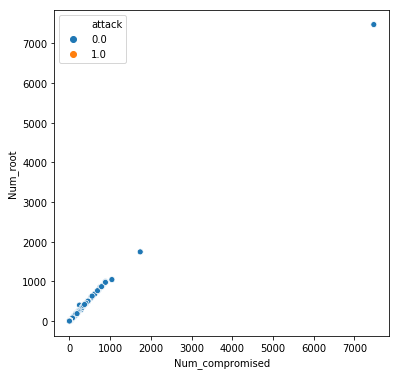

In [18]:
plt.figure(figsize=(6,6))
sns.scatterplot('Num_compromised','Num_root', data=train, hue=y)

C:\Users\Avinash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


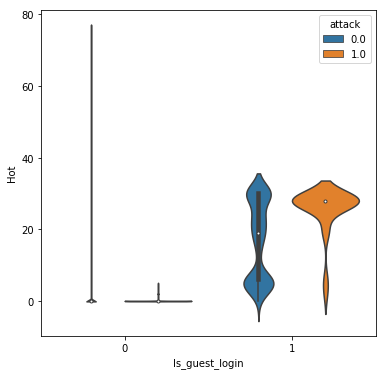

In [19]:
plt.figure(figsize=(6,6))
sns.violinplot('Is_guest_login', 'Hot', data=train, hue=y)

**Observation**: There are very few logins which are not guest.<br>
There are **guest logins** where **hot operations** are between 0-10 and 25-35 **are actually attack connections**.

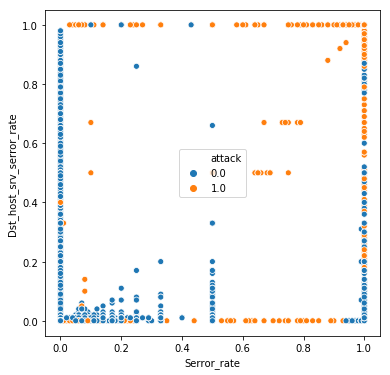

In [20]:
plt.figure(figsize=(6,6))
sns.scatterplot('Serror_rate', 'Dst_host_srv_serror_rate', data=train, hue=y)    

**Observation**: There are a lot of attacks happening.

In [21]:
np.unique(y[train['Serror_rate'] > 0.5], return_counts=True)

(array([0., 1.]), array([ 437, 8788], dtype=int64))

**Observation** : There are 8788 attacks when Serror_rate is greater than 0.5

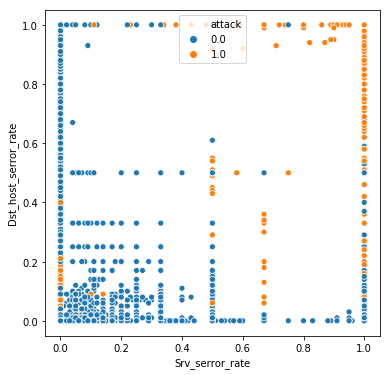

In [22]:
plt.figure(figsize=(6,6))
sns.scatterplot('Srv_serror_rate', 'Dst_host_serror_rate', data=train, hue=y)    

**Observation**: **Srv_serror_rate** and **Dst_host_serror_rate** are clear indicators of attacks happening or not.  <br>
Basically if I draw a diagonal line, it will separate most of the attacks. <br>
Equation of the classification line will be **Srv_serror_rate** + **Dst_host_serror_rate** = 1

In [23]:
np.unique(y[(train['Srv_serror_rate'] + train['Dst_host_serror_rate']) > 1], return_counts=True)

(array([0., 1.]), array([ 311, 8786], dtype=int64))

**Observation** : 8786 attacks and 311 normal conditions when Srv_serror_rate + Dst_host_serror_rate greater than 1.

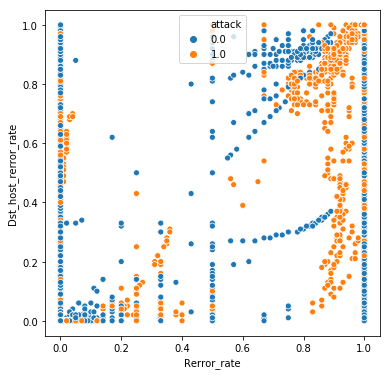

In [24]:
plt.figure(figsize=(6,6))
sns.scatterplot('Rerror_rate', 'Dst_host_rerror_rate', data=train, hue=y)    

**Observation**: Lots of attacks when **rerror_rate** greater than 0.5

In [25]:
y[train['Rerror_rate'] > 0.5].value_counts()
#np.unique(y[train['Rerror_rate'] > 0.5], return_counts=True)

1.0    3015
0.0    2948
Name: attack, dtype: int64

**Observation** : 3015 attacks and 2948 non attacks when rerror_rate greater than 0.5

Now we have done correlation plots and simple multivariate analysis to classify connections which are attack or normal.
Lets try to do this with machine learning algorithms.

# Handling Categorical Variables

In [26]:
encoded_cols = pd.get_dummies(train[cat_cols], drop_first=True)
encoded_cols.shape

(82000, 79)

In [27]:
train = pd.concat([train, encoded_cols], axis=1)
train.shape

(82000, 122)

# Creating Features and Labels

In [28]:
train.shape

(82000, 122)

In [29]:
train_df = train.drop(cat_cols, axis = 1)
train_df = train_df.drop(['attack', 'Num_outbound_cmds'], axis = 1)

In [30]:
X = train.drop(cat_cols, axis = 1)
X = X.drop(['attack', 'Num_outbound_cmds'], axis = 1)

In [31]:
X.shape

(82000, 117)

In [32]:
y = train['attack']
y.unique()

array([1., 0.])

In [33]:
# Lets create our train and validation split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [34]:
# metrics

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, recall_score

In [35]:
def model_train(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name + " Validation Data")
    cm = confusion_matrix(y_test, y_pred)
    print(name +" Confusion Matrix " +" Validation Data")
    print(cm)
    print('-----------------------')
    cr = classification_report(y_test, y_pred)
    print(name +" Classification Report " +" Validation Data")
    print(cr)
    print('------------------------')
    print(name +" AUC Score " +" Validation Data")
    auc = roc_auc_score(y_test, y_pred)
    print("AUC Score " + str(auc))
    print(name +" Recall " +" Validation Data")
    rec = recall_score(y_test, y_pred)
    print("Recall "+ str(rec))
    
    return auc, rec, model



# Model Building

## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 10, min_samples_leaf =3, random_state=101)

In [37]:
dt_auc, dt_rec, dt_model = model_train(dt, "Decision Tree")

Decision Tree Validation Data
Decision Tree Confusion Matrix  Validation Data
[[13402    26]
 [    7  2965]]
-----------------------
Decision Tree Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13428
         1.0       0.99      1.00      0.99      2972

   micro avg       1.00      1.00      1.00     16400
   macro avg       1.00      1.00      1.00     16400
weighted avg       1.00      1.00      1.00     16400

------------------------
Decision Tree AUC Score  Validation Data
AUC Score 0.9978542155540884
Decision Tree Recall  Validation Data
Recall 0.9976446837146703


**The metric of our choice should be Recall as we want to minimize FN, which means that an attack accured but the model did not detect it.**

## Naive Bayes Algorithm

In [38]:
# Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()

In [39]:
nb_auc, nb_rec, nb_model = model_train(nb_clf, "Naive Bayes Classifier")

Naive Bayes Classifier Validation Data
Naive Bayes Classifier Confusion Matrix  Validation Data
[[13192   236]
 [ 2276   696]]
-----------------------
Naive Bayes Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     13428
         1.0       0.75      0.23      0.36      2972

   micro avg       0.85      0.85      0.85     16400
   macro avg       0.80      0.61      0.63     16400
weighted avg       0.83      0.85      0.81     16400

------------------------
Naive Bayes Classifier AUC Score  Validation Data
AUC Score 0.6083052587730745
Naive Bayes Classifier Recall  Validation Data
Recall 0.23418573351278602


## Random Forest Algorithm

In [40]:
# Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 20, criterion='gini', max_depth = 10, min_samples_split=3, random_state=101)

In [41]:
rf_auc, rf_rec, rf_model = model_train(rf_clf, "Random Forest Classifier")

Random Forest Classifier Validation Data
Random Forest Classifier Confusion Matrix  Validation Data
[[13423     5]
 [   34  2938]]
-----------------------
Random Forest Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13428
         1.0       1.00      0.99      0.99      2972

   micro avg       1.00      1.00      1.00     16400
   macro avg       1.00      0.99      1.00     16400
weighted avg       1.00      1.00      1.00     16400

------------------------
Random Forest Classifier AUC Score  Validation Data
AUC Score 0.9940937680289593
Random Forest Classifier Recall  Validation Data
Recall 0.9885598923283984


## XGBoost Classification

In [42]:
from xgboost.sklearn import XGBClassifier
xgb_clf = XGBClassifier(random_state=101)

In [43]:
xgb_auc, xgb_rec, xgb_model = model_train(xgb_clf, "XGBoost Classifier")

XGBoost Classifier Validation Data
XGBoost Classifier Confusion Matrix  Validation Data
[[13422     6]
 [   19  2953]]
-----------------------
XGBoost Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13428
         1.0       1.00      0.99      1.00      2972

   micro avg       1.00      1.00      1.00     16400
   macro avg       1.00      1.00      1.00     16400
weighted avg       1.00      1.00      1.00     16400

------------------------
XGBoost Classifier AUC Score  Validation Data
AUC Score 0.9965800855647647
XGBoost Classifier Recall  Validation Data
Recall 0.993606998654105


Let try some hyper-parameter tuning to improve XGBoost

## GridSearch on XGBoost

In [44]:
from sklearn.model_selection import GridSearchCV

xgb_gs_clf = XGBClassifier()                         
                        
param_grid = {"max_depth": [7,10],                 # Max depth of each learner (Decision Tree)
              "n_estimators": [50,70,100] ,        # Number of trees
              "gamma": [0.03],                     # Minimum reduction in loss(entropy) to make further branches
              "learning_rate": [0.08],             # Learning Rate
              "min_child_weight": [5],             # Minimum sum of instance weight (hessian) needed in a child
              "colsample_bytree": [0.8],           # Subsample ratio of columns when constructing each tree
              "subsample": [0.85]}                 # Subsample ratio of the training instance

grid_search = GridSearchCV(xgb_gs_clf, 
                           param_grid=param_grid,
                           cv = 2,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)

grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   57.4s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.0min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [7, 10], 'n_estimators': [50, 70, 100], 'gamma': [0.03], 'learning_rate': [0.08], 'min_child_weight': [5], 'colsample_bytree': [0.8], 'subsample': [0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=2)

In [45]:
gs_y_pred = grid_search.predict(X_test)

In [46]:
# metrics

cm = confusion_matrix(y_test, gs_y_pred) 
print("Confusion Matrix GridSearchCV XGBoost")
print(cm)
print('-----------------------')
cr = classification_report(y_test, gs_y_pred)
print("Classification Report GridSearchCV XGBoost")
print(cr)
print('------------------------')
gs_auc = roc_auc_score(y_test, gs_y_pred)
print("AUC Score ", gs_auc)
print('------------------------')
gs_rec = recall_score(y_test, gs_y_pred)
print("Recall  ", gs_rec)

Confusion Matrix GridSearchCV XGBoost
[[13424     4]
 [    3  2969]]
-----------------------
Classification Report GridSearchCV XGBoost
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13428
         1.0       1.00      1.00      1.00      2972

   micro avg       1.00      1.00      1.00     16400
   macro avg       1.00      1.00      1.00     16400
weighted avg       1.00      1.00      1.00     16400

------------------------
AUC Score  0.9993463468592375
------------------------
Recall   0.9989905787348586


In [47]:
print(grid_search.best_params_)

{'colsample_bytree': 0.8, 'gamma': 0.03, 'learning_rate': 0.08, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.85}


**Observation** : auc roc score of 0.998 which is the best model. <br>

# Conclusion

In [48]:
rec_scores = [dt_rec, nb_rec, rf_rec, xgb_rec, gs_rec]
label = ['dt', 'nb', 'rf', 'xgb', 'gs']
index = np.arange(len(rec_scores))
print(list(zip(label, rec_scores)))

[('dt', 0.9976446837146703), ('nb', 0.23418573351278602), ('rf', 0.9885598923283984), ('xgb', 0.993606998654105), ('gs', 0.9989905787348586)]


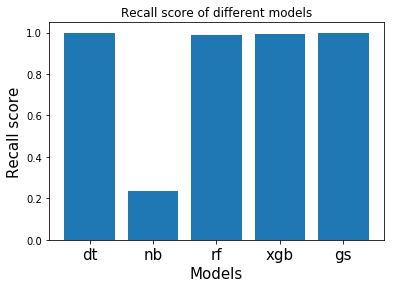

In [49]:
plt.bar(index, rec_scores)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Recall score', fontsize=15)
plt.xticks(index, label, fontsize=15)
plt.title('Recall score of different models')
plt.show()

Grid Search XGBoost has provided the best accuracy score followed by Random Forest.

In [50]:
auc_scores = [dt_auc, nb_auc, rf_auc, xgb_auc, gs_auc]
label = ['dt', 'nb', 'rf', 'xgb', 'gs']
index = np.arange(len(auc_scores))
print(list(zip(label, auc_scores)))

[('dt', 0.9978542155540884), ('nb', 0.6083052587730745), ('rf', 0.9940937680289593), ('xgb', 0.9965800855647647), ('gs', 0.9993463468592375)]


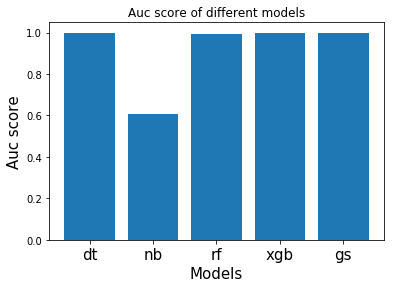

In [51]:
plt.bar(index, auc_scores)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Auc score', fontsize=15)
plt.xticks(index, label, fontsize=15)
plt.title('Auc score of different models')
plt.show()

Grid Search XGBoost has provided the best auc score followed by Random Forest.

# Model Explainations

### Permutation Importance

We will run the permutation importance using Decision Tree Classifier

In [52]:
import eli5

from eli5.sklearn import PermutationImportance

perm = PermutationImportance(dt_model, random_state=101).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.values)

Weight,Feature
0.1391 ± 0.0029,Src_bytes
0.0950 ± 0.0025,Dst_bytes
0.0856 ± 0.0031,Dst_host_diff_srv_rate
0.0420 ± 0.0007,last_flag
0.0390 ± 0.0011,Dst_host_count
0.0117 ± 0.0007,Service_ecr_i
0.0116 ± 0.0011,Service_http
0.0087 ± 0.0005,Dst_host_srv_diff_host_rate
0.0045 ± 0.0008,Dst_host_srv_serror_rate
0.0036 ± 0.0005,Service_smtp


Lets check the same with Random Forest classifier

In [53]:
perm = PermutationImportance(rf_model, random_state=101).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.values)

Weight,Feature
0.0053 ± 0.0003,Src_bytes
0.0050 ± 0.0003,Dst_bytes
0.0038 ± 0.0003,last_flag
0.0033 ± 0.0001,Service_ecr_i
0.0021 ± 0.0004,Dst_host_srv_diff_host_rate
0.0021 ± 0.0003,Dst_host_same_src_port_rate
0.0016 ± 0.0002,Protocol_type_tcp
0.0013 ± 0.0003,Dst_host_same_srv_rate
0.0008 ± 0.0001,Service_private
0.0007 ± 0.0003,Diff_srv_rate


**Conclusion**: The columns in the green are the most important features.

### Shap

Lets see how the columns impact a single record of data

In [54]:
row_to_show = 7
data_to_predict = X_test.iloc[row_to_show]
#data_to_predict

In [55]:
data_to_preddict_array = data_to_predict.values.reshape(1,-1)

dt_model.predict_proba(data_to_preddict_array)

array([[1.12233446e-04, 9.99887767e-01]])

In [56]:
dt_model.predict(data_to_preddict_array)

array([1.])

In [57]:
y_test.iloc[row_to_show]

1.0

In [58]:
import shap

# Object that can calculate Shap values
explainer = shap.TreeExplainer(dt_model)

# Calculate the shap values
shap_values = explainer.shap_values(data_to_predict)

In [59]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_to_predict)

### LIME

In [60]:
import lime
import lime.lime_tabular

In [65]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                         feature_names=X_train.columns.values.tolist(),
                                                         mode='classification',class_names='Attack')


In [66]:
lime_expln1=explainer.explain_instance(X_test.iloc[1],dt_model.predict_proba,num_features=X_test.shape[1], top_labels = 1)
lime_expln1.show_in_notebook(show_table=True, show_all=False)